In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df_s = pd.read_csv('szl_data.csv', names = ("Anio", "Mes", "dia", "Hora", "Altura" ), header = 0) #La altura está en mm
df_m = pd.read_csv('Mtry_CA_hr.csv', names = ("Date Time", "Water Level", "Sigma", "I", "L"), header = 0)

In [3]:
df_s.dtypes

Anio       int64
Mes        int64
dia        int64
Hora       int64
Altura    object
dtype: object

In [4]:
df_m.dtypes

Date Time       object
Water Level    float64
Sigma          float64
I                int64
L                int64
dtype: object

In [5]:
df_s['date'] = df_s.apply(lambda x:datetime.strptime("{0} {1} {2} {3}".format(x[u'Anio'],x[u'Mes'], x[u'dia'], x[u'Hora']), "%Y %m %d %H"),axis=1)
df_m["Date Time"]= pd.to_datetime(df_m["Date Time"], format = '%Y %m %d %H:%M:')

In [6]:
df_s['Altura']=pd.to_numeric(df_s['Altura'], errors = 'coerce')
df_s.apply(lambda x: sum(x.isnull()),axis=0)

Anio        0
Mes         0
dia         0
Hora        0
Altura    185
date        0
dtype: int64

In [7]:
df_s.dtypes

Anio               int64
Mes                int64
dia                int64
Hora               int64
Altura           float64
date      datetime64[ns]
dtype: object

In [8]:
df_m.apply(lambda x: sum(x.isnull()),axis=0)

Date Time      0
Water Level    0
Sigma          0
I              0
L              0
dtype: int64

In [9]:
szl = df_s[(df_s['date'] >= '2016-01-01 00:00:00') & (df_s['date'] <= '2016-03-31 23:00:00')]
mty = df_m

In [10]:
szl.head(),szl.tail(),mty.head(), mty.tail()

(   Anio  Mes  dia  Hora  Altura                date
 0  2016    1    1     0   670.0 2016-01-01 00:00:00
 1  2016    1    1     1   506.0 2016-01-01 01:00:00
 2  2016    1    1     2   384.0 2016-01-01 02:00:00
 3  2016    1    1     3   330.0 2016-01-01 03:00:00
 4  2016    1    1     4   356.0 2016-01-01 04:00:00,
       Anio  Mes  dia  Hora  Altura                date
 2179  2016    3   31    19   266.0 2016-03-31 19:00:00
 2180  2016    3   31    20   366.0 2016-03-31 20:00:00
 2181  2016    3   31    21   503.0 2016-03-31 21:00:00
 2182  2016    3   31    22   645.0 2016-03-31 22:00:00
 2183  2016    3   31    23   763.0 2016-03-31 23:00:00,
             Date Time  Water Level  Sigma  I  L
 0 2016-12-01 00:00:00        0.035  0.034  0  0
 1 2016-12-01 01:00:00       -0.101  0.049  0  0
 2 2016-12-01 02:00:00       -0.057  0.033  0  0
 3 2016-12-01 03:00:00        0.129  0.042  0  0
 4 2016-12-01 04:00:00        0.383  0.048  0  0,
                Date Time  Water Level  Sigma  I 

In [11]:
z = np.arange(0.0, 2184.0 +0.0, 1.0)
k = np.arange(0.0, 2160.0 +0.0, 1.0)

In [12]:
szl['T'] =  pd.Series(z, index =None)
mty['T'] = pd.Series(k, index=None)

C:\Users\Suset\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
szl.head(), szl.tail(), mty.head(), mty.tail()

(   Anio  Mes  dia  Hora  Altura                date    T
 0  2016    1    1     0   670.0 2016-01-01 00:00:00  0.0
 1  2016    1    1     1   506.0 2016-01-01 01:00:00  1.0
 2  2016    1    1     2   384.0 2016-01-01 02:00:00  2.0
 3  2016    1    1     3   330.0 2016-01-01 03:00:00  3.0
 4  2016    1    1     4   356.0 2016-01-01 04:00:00  4.0,
       Anio  Mes  dia  Hora  Altura                date       T
 2179  2016    3   31    19   266.0 2016-03-31 19:00:00  2179.0
 2180  2016    3   31    20   366.0 2016-03-31 20:00:00  2180.0
 2181  2016    3   31    21   503.0 2016-03-31 21:00:00  2181.0
 2182  2016    3   31    22   645.0 2016-03-31 22:00:00  2182.0
 2183  2016    3   31    23   763.0 2016-03-31 23:00:00  2183.0,
             Date Time  Water Level  Sigma  I  L    T
 0 2016-12-01 00:00:00        0.035  0.034  0  0  0.0
 1 2016-12-01 01:00:00       -0.101  0.049  0  0  1.0
 2 2016-12-01 02:00:00       -0.057  0.033  0  0  2.0
 3 2016-12-01 03:00:00        0.129  0.042  0  0  

In [14]:
#Transformada de Fourier para datos de El Sauzal
from scipy.fftpack import fft, fftfreq, fftshift
import numpy as np
# number of points
N = 2184
# sample spacing
T = 1.0
y = szl["Altura"]/1000.0
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)

#Amplitudes notorias, fueron ubicadas en la actividad 6
A0_s = np.absolute(yf[int(0),]/N)
A1_s = 2.0*np.absolute(yf[int(84),]/N)
A2_s = 2.0*np.absolute(yf[int(85),]/N)
A3_s= 2.0*np.absolute(yf[int(90),]/N)
A4_s = 2.0*np.absolute(yf[int(91),]/N)
A5_s = 2.0*np.absolute(yf[int(92),]/N)
A6_s = 2.0*np.absolute(yf[int(172),]/N)
A7_s = 2.0*np.absolute(yf[int(173),]/N)
A8_s = 2.0*np.absolute(yf[int(174),]/N)
A9_s = 2.0*np.absolute(yf[int(175),]/N)
A10_s =  2.0*np.absolute(yf[int(176),]/N)
A11_s = 2.0*np.absolute(yf[int(177),]/N)
A12_s = 2.0*np.absolute(yf[int(182),]/N)

In [15]:
#Transformada de Fourier para datos de Monterey
from scipy.fftpack import fft, fftfreq, fftshift
import numpy as np
# number of points
N_d = 2160
# sample spacing
T_d = 1.0
y_hr = mty['Water Level']
yf_hr = fft(y_hr)
xf_hr = fftfreq(N_d, T_d)
xf_hr = fftshift(xf_hr)
yplot_hr = fftshift(yf_hr)

#Amplitudes notorias, fueron ubicadas en la actividad 6
A0_m = np.absolute(yf_hr[0,]/N_d)
A1_m = 2.0*np.absolute(yf_hr[6,]/N_d)
A2_m = 2.0*np.absolute(yf_hr[7,]/N_d)
A3_m = 2.0*np.absolute(yf_hr[83,]/N_d)
A4_m = 2.0*np.absolute(yf_hr[84,]/N_d)
A5_m = 2.0*np.absolute(yf_hr[90,]/N_d)
A6_m = 2.0*np.absolute(yf_hr[91,]/N_d)
A7_m = 2.0*np.absolute(yf_hr[170,]/N_d)
A8_m = 2.0*np.absolute(yf_hr[171,]/N_d)
A9_m = 2.0*np.absolute(yf_hr[173,]/N_d)
A10_m = 2.0*np.absolute(yf_hr[174,]/N_d)
A11_m = 2.0*np.absolute(yf_hr[180,]/N_d)

In [16]:
#Frecuencias que se presentan en el Sauzal
f_A1s = xf[int(N/2 +84)]
f_A2s = xf[int(N/2 +85),]
f_A3s =  xf[int(N/2 +90),]
f_A4s =  xf[int(N/2 +91),]
f_A5s =  xf[int(N/2 +92),]
f_A6s =  xf[int(N/2 +172),]
f_A7s =  xf[int(N/2 +173),]
f_A8s =  xf[int(N/2 +174),]
f_A9s =  xf[int(N/2 +175),]
f_A10s =  xf[int(N/2 +176),]
f_A11s =  xf[int(N/2 +177),]
f_A12s =  xf[int(N/2 +182),]

# Fases que se presentan en el Sauzal
qA0s = np.angle(yf[int(0),])
qA1s = np.angle(yf[int(84),])
qA2s = np.angle(yf[int(85),])
qA3s = np.angle(yf[int(90),])
qA4s = np.angle(yf[int(91),])
qA5s = np.angle(yf[int(92),])
qA6s =  np.angle(yf[int(172),])
qA7s =  np.angle(yf[int(173),])
qA8s =  np.angle(yf[int(174),])
qA9s =  np.angle(yf[int(175),])
qA10s =  np.angle(yf[int(176),])
qA11s =  np.angle(yf[int(177),])
qA12s =  np.angle(yf[int(182),])

#Frecuencias que se presentan en el Monterey
f_A1m = xf_hr[int(N_d/2 +6),]
f_A2m = xf_hr[int(N_d/2 +7),]
f_A3m = xf_hr[int(N_d/2 +83),]
f_A4m = xf_hr[int(N_d/2 +84),]
f_A5m = xf_hr[int(N_d/2 +90),]
f_A6m = xf_hr[int(N_d/2 +91),]
f_A7m = xf_hr[int(N_d/2 +170),]
f_A8m = xf_hr[int(N_d/2 +171),]
f_A9m = xf_hr[int(N_d/2 +173),]
f_A10m = xf_hr[int(N_d/2 +174),]
f_A11m = xf_hr[int(N_d/2 +180),]

#fases de cada componente encontrada en Monterey (fases de las amplitudes)
qA0m = np.angle(yf_hr[0,])
qA1m = np.angle(yf_hr[6,])
qA2m = np.angle(yf_hr[7,])
qA3m = np.angle(yf_hr[83,])
qA4m = np.angle(yf_hr[84,])
qA5m = np.angle(yf_hr[90,])
qA6m = np.angle(yf_hr[91,])
qA7m = np.angle(yf_hr[170,])
qA8m = np.angle(yf_hr[171,])
qA9m = np.angle(yf_hr[173,])
qA10m = np.angle(yf_hr[174,])
qA11m = np.angle(yf_hr[180,])

In [17]:
print(qA0s, qA2s)

0.0 -1.20982114156


# Reconstrucción de la Marea en El Sauzal

In [41]:
#Aproximacion a la marea de El Sauzal
y= szl['Altura']/1000
w= 2.0*np.pi
a=0
def f(t):
    return A0_s + (A1_s*np.cos(w*f_A1s*t+qA1s) + A2_s*np.cos(w*f_A2s *t+qA2s) 
                   + A3_s*np.cos(w*f_A3s*t+qA3s) + A4_s*np.cos(w*f_A4s*t + qA4s)
                   + A5_s*np.cos(w*f_A5s*t+qA5s) + A6_s*np.cos(w*f_A6s*t + qA6s)
                   + A7_s*np.cos(w*f_A7s*t+qA7s) + A8_s*np.cos(w*f_A8s*t+ qA8s)
                   + A9_s*np.cos(w*f_A9s*t+ qA9s) + A10_s*np.cos(w*f_A10s*t+ qA10s) 
                   + A11_s*np.cos(w*f_A11s*t+ qA11s) + A12_s*np.cos(w*f_A12s*t+ qA12s))

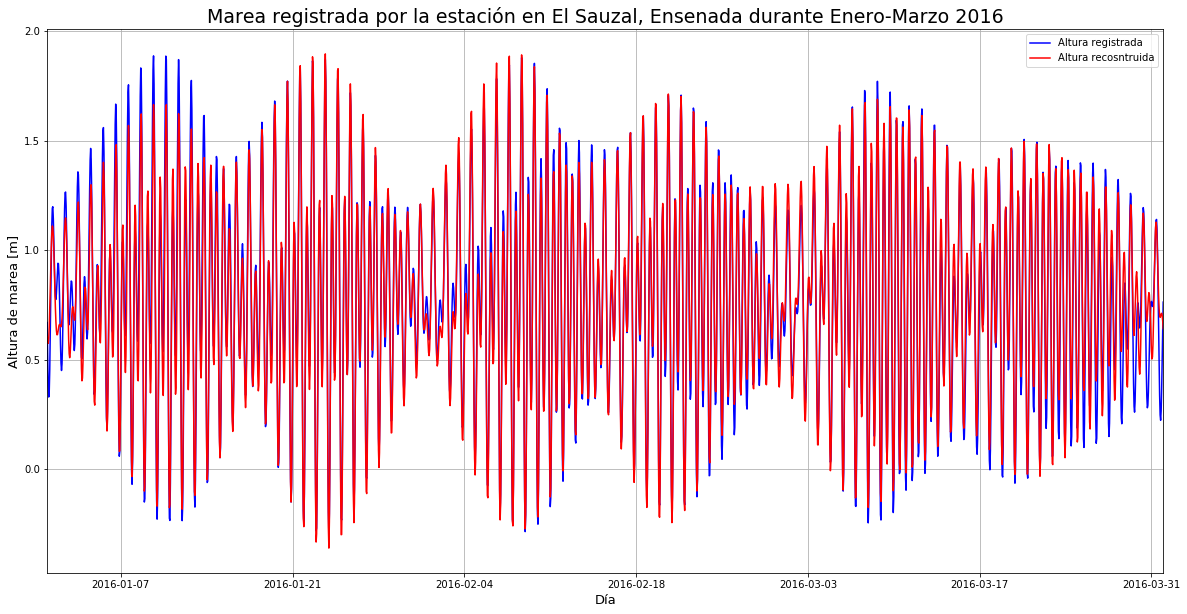

In [47]:
#Gráfica de la aproximación de la marea en El Sauzal
import matplotlib.pyplot as plt
#Marea real registrada
plt.plot(szl['date'], szl['Altura']/1000, 'b-', label ="Altura registrada")

#Marea reconstruida
plt.plot(szl['date'], f(szl['T']), 'r-', label='Altura recosntruida')
                          


plt.xlim(pd.Timestamp("2016-01-01 00:00:00"), pd.Timestamp('2016-03-31 23:00:00'))
plt.ylabel('Altura de marea [m]', fontsize = 13)
plt.xlabel('Día', fontsize = 13)
plt.title('Marea registrada por la estación en El Sauzal, Ensenada durante Enero-Marzo 2016', fontsize= 19)
plt.legend()
plt.grid(True) 

fig = plt.gcf()

fig.set_size_inches(20, 10)
plt.show()

# Cálculo de error relativo de la aproximación para la marea de El Sauzal

In [39]:
y1 = f(szl['T'])
y = szl['Altura']/1000

y1.head(5), y.head(5)

(0    0.606055
 1    0.580108
 2    0.574793
 3    0.597436
 4    0.650153
 Name: T, dtype: float64, 0    0.670
 1    0.506
 2    0.384
 3    0.330
 4    0.356
 Name: Altura, dtype: float64)

In [22]:
max(y), max(y1), sum(abs(szl['Altura']/1000))

(1.8859999999999999, 1.8950322339802319, 1743.4830000000006)

* Error relativo obtenido

In [23]:
err_s = np.sum(np.abs(y1-y)**2)/np.sum(np.abs(y)**2),
err_s

(0.011133759857637149,)

# Reconstrucción de la marea en Monterey

In [24]:
#Aproximacion para la marea en Monterey
w= 2.0*np.pi
def g(t):
    return A0_m    + (A1_m*np.cos(w*f_A1m*t+qA1m) + A2_m*np.cos(w*f_A2m *t+qA2m) 
                   + A3_m*np.cos(w*f_A3m*t+qA3m) + A4_m*np.cos(w*f_A4m*t+qA4m) 
                   + A5_m*np.cos(w*f_A5m*t+qA5m) + A6_m*np.cos(w*f_A6m*t+qA6m) 
                   + A7_m*np.cos(w*f_A7m *t+qA7m) + A8_m*np.cos(w*f_A8m*t+qA8m) 
                   + A9_m*np.cos(w*f_A9m*t+qA9m) + A5_m*np.cos(w*f_A10m*t+qA10m)
                   + A5_m*np.cos(w*f_A10m*t+qA10m))

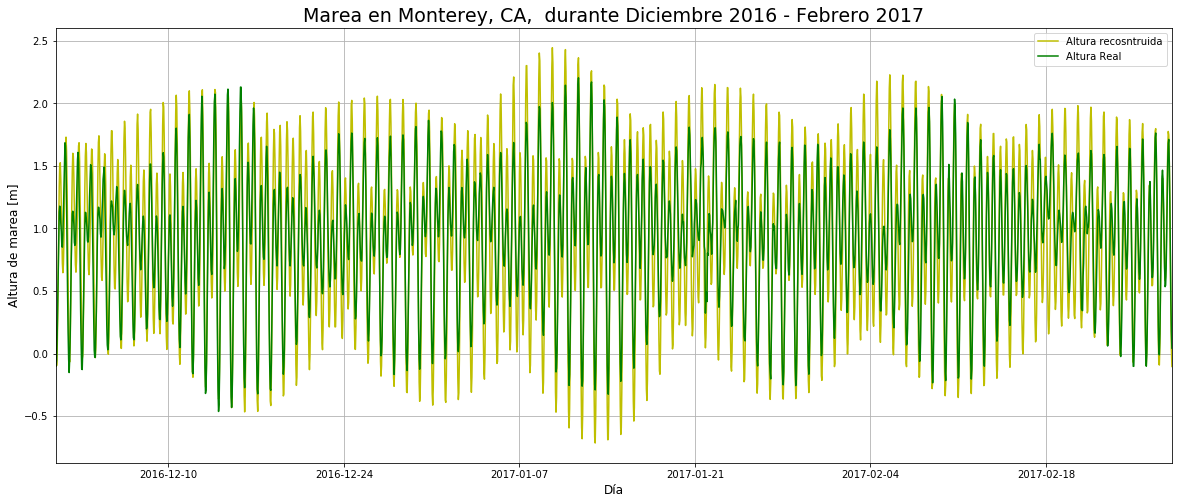

In [34]:
#gráfica de la aproximación de la marea en Monterey
import matplotlibtlib.pyplot as plt
#Marea reconstruida
plt.plot(mty['Date Time'], g(mty['T']), 'y-', label='Altura recosntruida')

#Marea real registrada
plt.plot(mty[u'Date Time'], mty[u'Water Level'], 'g', label ="Altura Real")

plt.xlim(pd.Timestamp('2016-12-01 00:00:00'), pd.Timestamp('2017-02-28 00:23:00'))
plt.ylabel('Altura de marea [m]', fontsize = 12)
plt.xlabel('Día', fontsize=12)
plt.title('Marea en Monterey, CA,  durante Diciembre 2016 - Febrero 2017', fontsize = 19)
plt.legend()
plt.grid(True)
plt.grid(True)

fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.show()

# Error relativo en la aproximación de la marea en Monterey

In [33]:
y_m = mty['Water Level']
y1_m = g(mty['T'])
y_m.head(3), y1_m.head(3)

(0    0.035
 1   -0.101
 2   -0.057
 Name: Water Level, dtype: float64, 0    0.261640
 1   -0.005645
 2   -0.096424
 Name: T, dtype: float64)

* Error relativo

In [27]:
err_s = np.sum(np.abs(y1_m-y_m)**2)/np.sum(np.abs(y_m)**2),
err_s

(0.05863425834523114,)

In [29]:
np.mean(np.abs(y1_m-y_m))

0.2144591877048762

In [30]:
max(y_m), max(y1_m)

(2.2030000000000003, 2.4438932798924657)

# Aumento a las gráficas obtenidas de las mareas

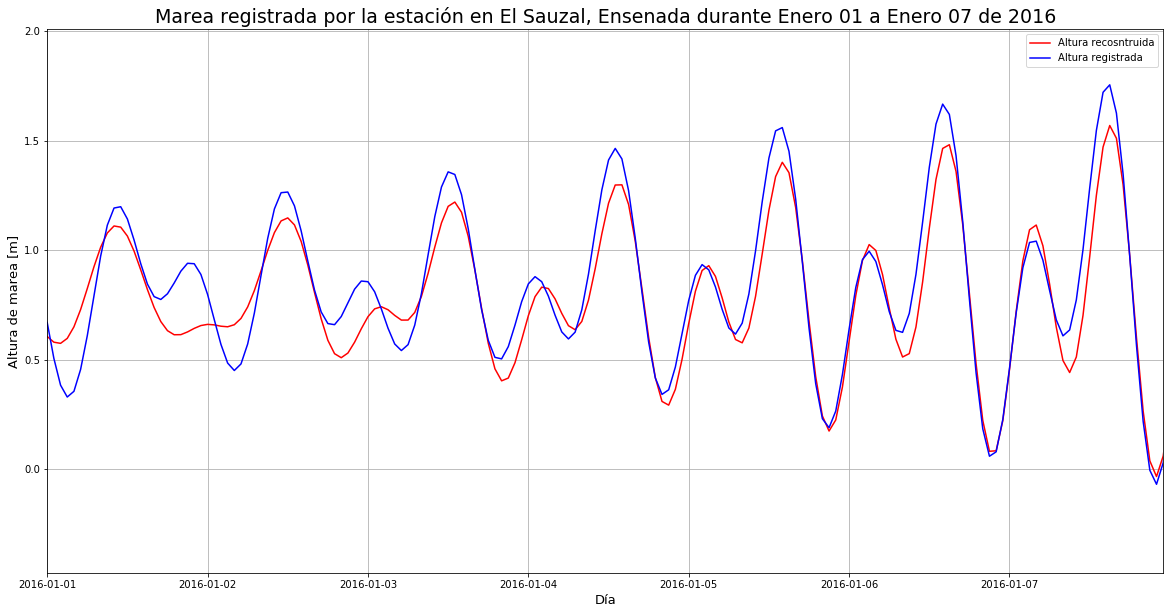

In [48]:
#Gráfica aumentada de la aproximación de la marea en El Sauzal
import matplotlib.pyplot as plt

#Marea reconstruida
plt.plot(szl['date'], f(szl['T']), 'r-', label='Altura recosntruida')
                          
#Marea real registrada
plt.plot(szl['date'], szl['Altura']/1000, 'b-', label ="Altura registrada")
                          
                          
plt.xlim(pd.Timestamp("2016-01-01 00:00:00"), pd.Timestamp('2016-01-07 23:00:00'))
plt.ylabel('Altura de marea [m]', fontsize = 13)
plt.xlabel('Día', fontsize = 13)
plt.title('Marea registrada por la estación en El Sauzal, Ensenada durante Enero 01 a Enero 07 de 2016', fontsize= 19)
plt.legend()
plt.grid(True) 

fig = plt.gcf()

fig.set_size_inches(20, 10)
plt.show()

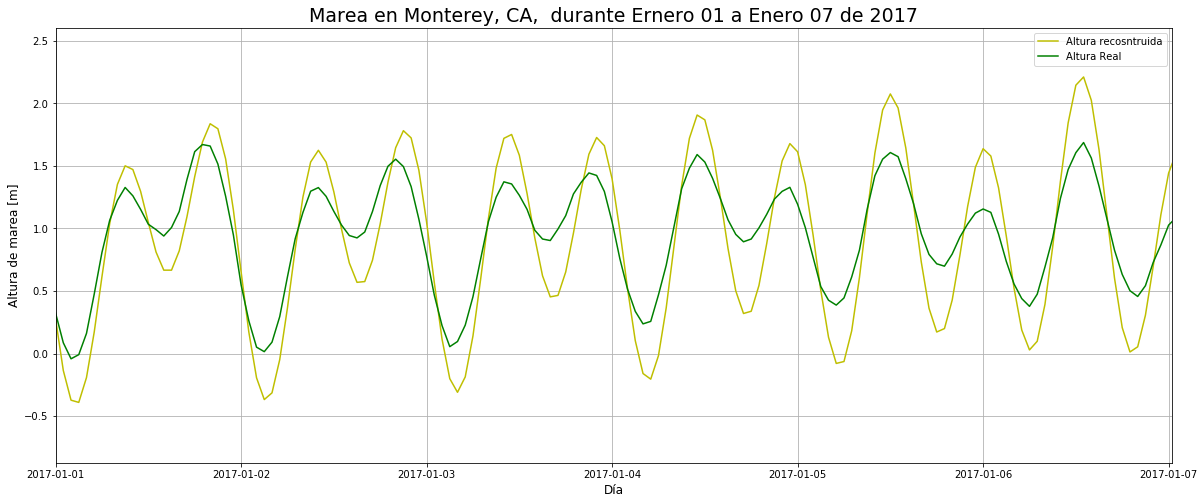

In [50]:
#gráfica aumentada de la aproximación de la marea en Monterey
import matplotlib.pyplot as plt
#Marea reconstruida
plt.plot(mty['Date Time'], g(mty['T']), 'y-', label='Altura recosntruida')

#Marea real registrada
plt.plot(mty[u'Date Time'], mty[u'Water Level'], 'g', label ="Altura Real")

plt.xlim(pd.Timestamp('2017-01-01 00:00:00'), pd.Timestamp('2017-01-07 00:23:00'))
plt.ylabel('Altura de marea [m]', fontsize = 12)
plt.xlabel('Día', fontsize=12)
plt.title('Marea en Monterey, CA,  durante Ernero 01 a Enero 07 de 2017', fontsize = 19)
plt.legend()
plt.grid(True)
plt.grid(True)

fig = plt.gcf()
fig.set_size_inches(20, 8)
plt.show()